In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
data=pd.read_csv("ToyotaCorolla - MLR.csv")
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [3]:
## the Fuel_type is categorical variable while others are interger variables.

In [4]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [5]:
## there are no null values

In [6]:
X_features = ["Age_08_04","KM","Fuel_Type","HP","Automatic","cc","Doors","Cylinders","Gears","Weight"]

In [7]:
categorical_variable=["Fuel_Type"]
data_dummy = pd.get_dummies(data[X_features], columns = categorical_variable, drop_first = True )
data_dummy.columns

Index(['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [8]:
data1 = data_dummy.drop(['Cylinders'], axis = 1)
data1.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,1,0
1,23,72937,90,0,2000,3,5,1165,1,0
2,24,41711,90,0,2000,3,5,1165,1,0
3,26,48000,90,0,2000,3,5,1165,1,0
4,30,38500,90,0,2000,3,5,1170,1,0


In [9]:
## Correlation matrix
data1.corr()

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Age_08_04,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253,-0.097740,0.092611
KM,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598,0.403060,-0.433160
HP,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614,-0.533453,0.489110
Automatic,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249,-0.084490,0.080249
cc,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637,0.327723,-0.315170
Doors,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618,0.025495,-0.027589
Gears,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613,-0.048847,0.063182
Weight,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000,0.568087,-0.560470
Fuel_Type_Diesel,-0.097740,0.403060,-0.533453,-0.084490,0.327723,0.025495,-0.048847,0.568087,1.000000,-0.942976
Fuel_Type_Petrol,0.092611,-0.433160,0.489110,0.080249,-0.315170,-0.027589,0.063182,-0.560470,-0.942976,1.000000


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age_08_04         1436 non-null   int64
 1   KM                1436 non-null   int64
 2   HP                1436 non-null   int64
 3   Automatic         1436 non-null   int64
 4   cc                1436 non-null   int64
 5   Doors             1436 non-null   int64
 6   Gears             1436 non-null   int64
 7   Weight            1436 non-null   int64
 8   Fuel_Type_Diesel  1436 non-null   uint8
 9   Fuel_Type_Petrol  1436 non-null   uint8
dtypes: int64(8), uint8(2)
memory usage: 92.7 KB


In [11]:
data1.describe()

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000
mean,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,5.026462,1072.45961,0.107939,0.880223
std,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.188510,52.64112,0.310411,0.324814
min,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,3.000000,1000.00000,0.000000,0.000000
25%,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,5.000000,1040.00000,0.000000,1.000000
50%,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,5.000000,1070.00000,0.000000,1.000000
75%,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,5.000000,1085.00000,0.000000,1.000000
max,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,6.000000,1615.00000,1.000000,1.000000


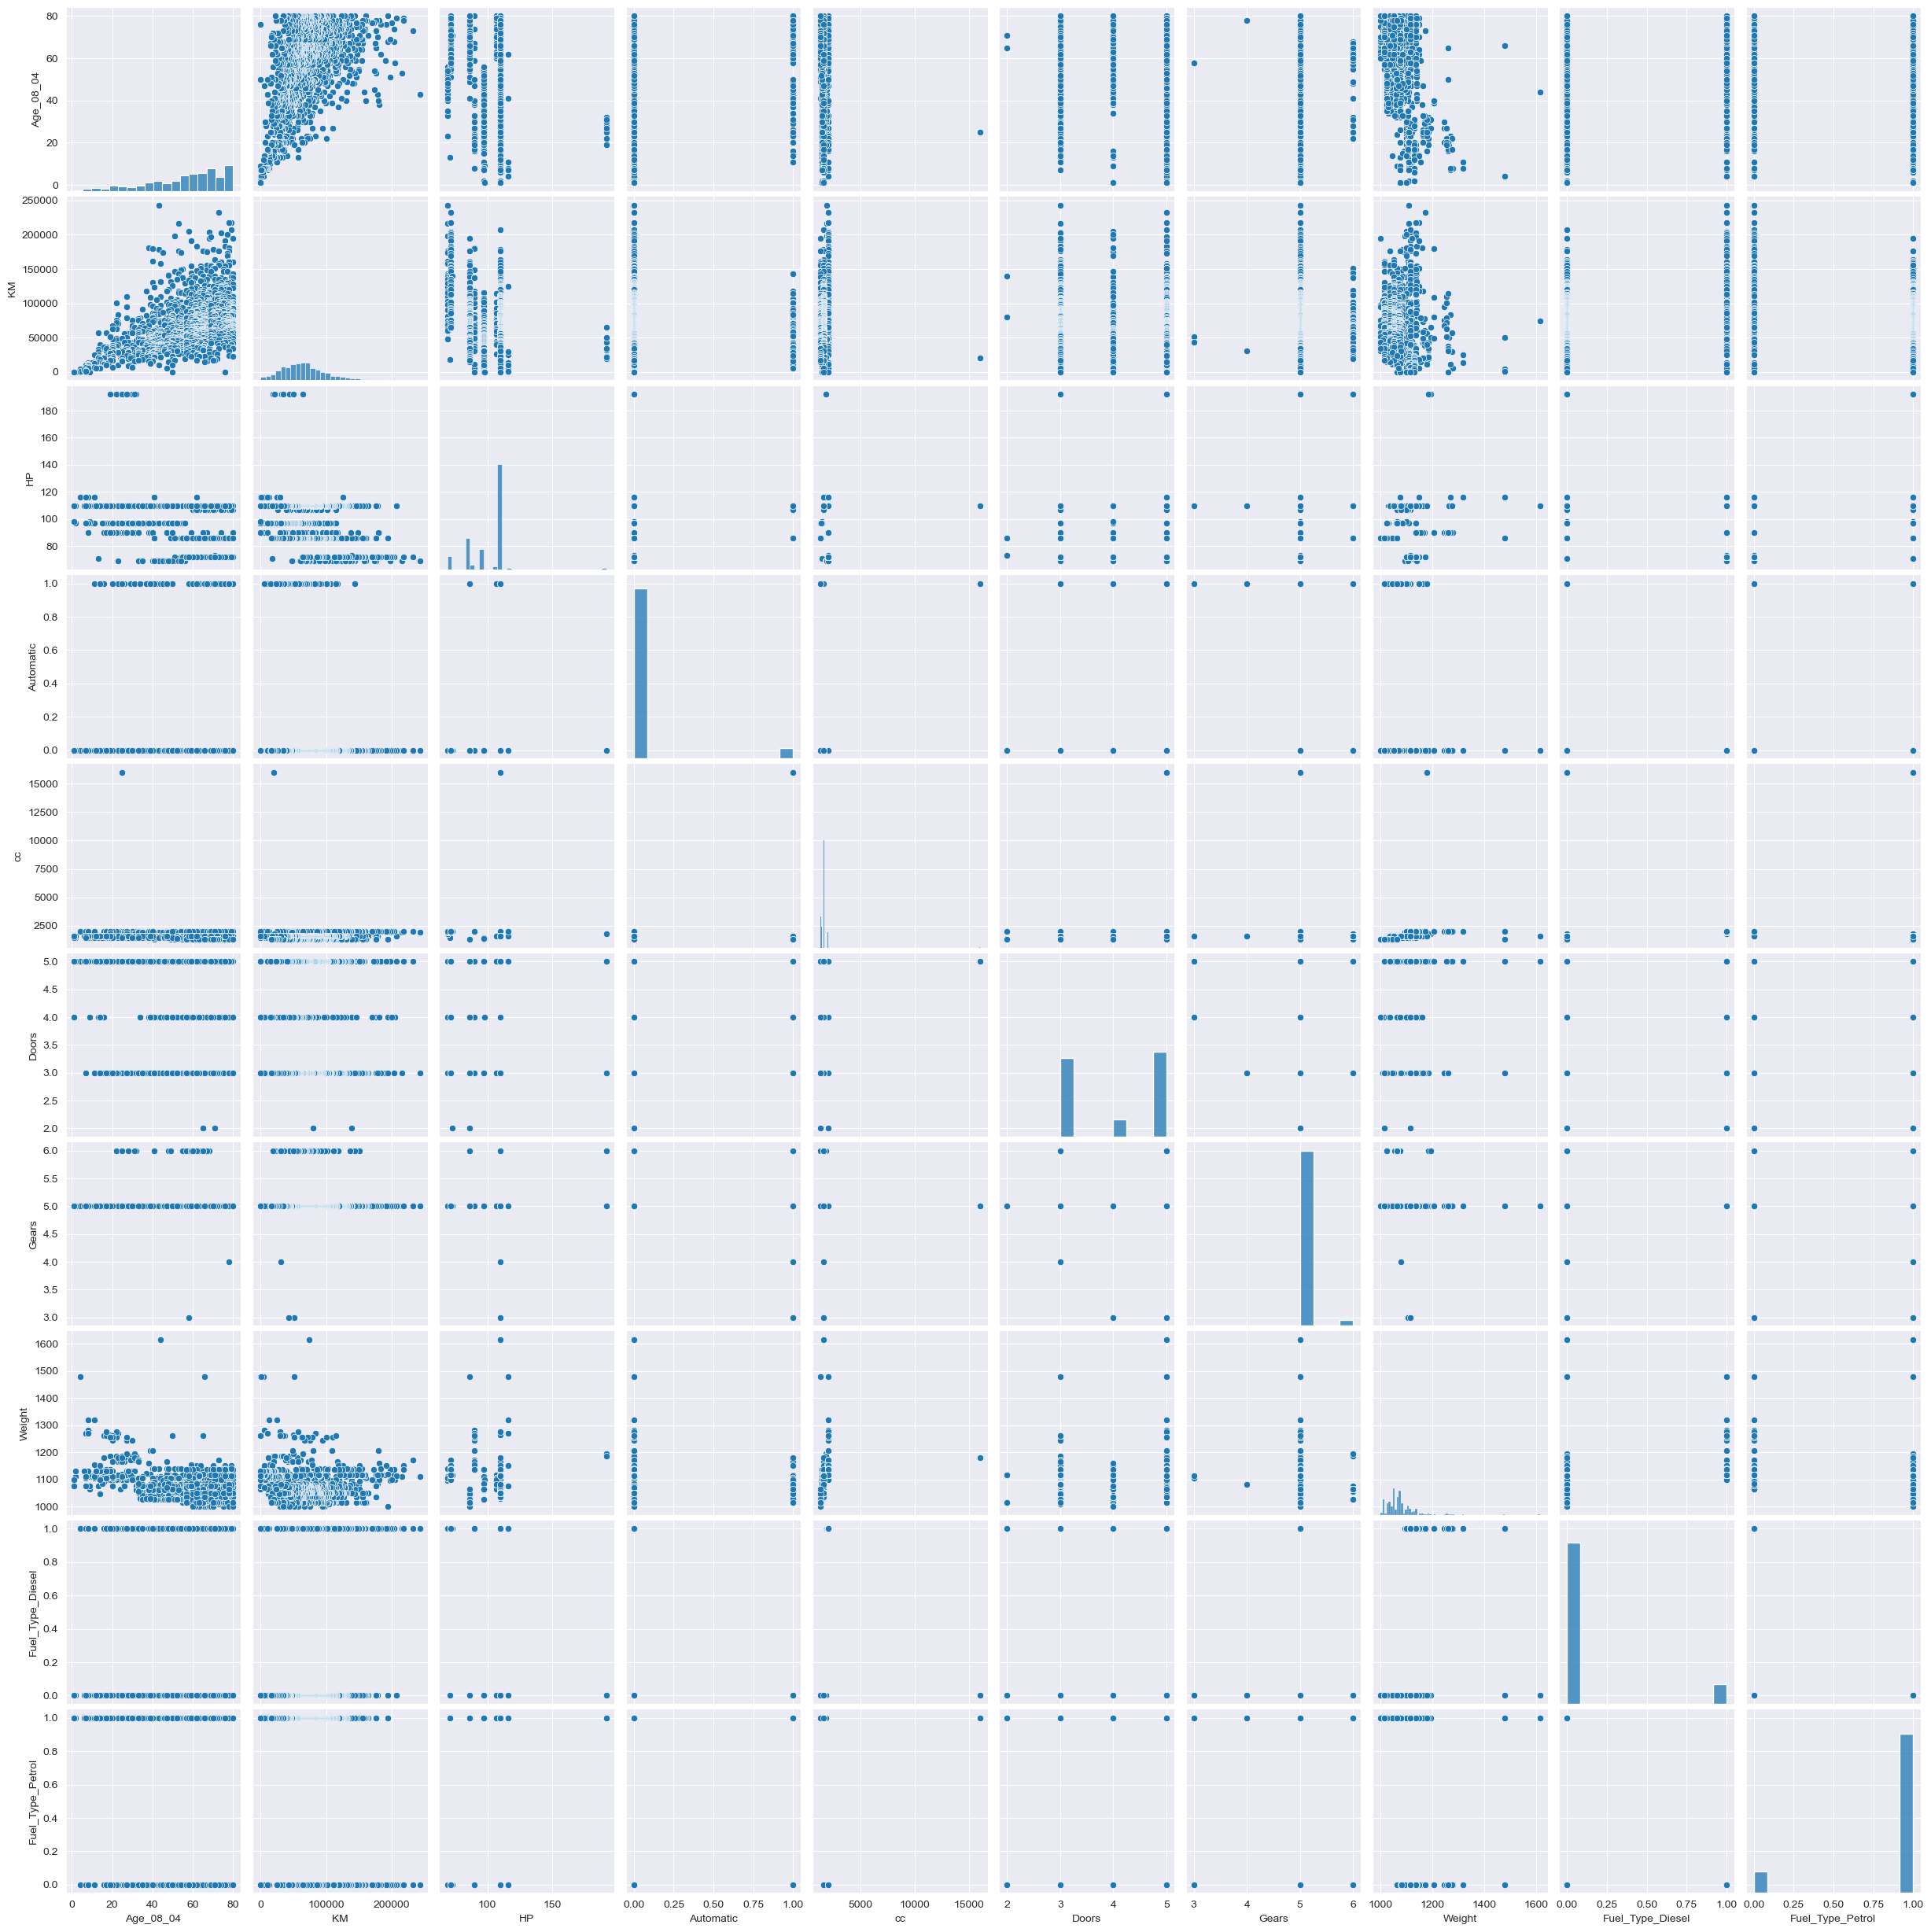

In [12]:
sn.set_style(style='darkgrid')
sn.pairplot(data1)

In [13]:
data1.isnull().sum()

Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64

In [14]:
import statsmodels.formula.api as smf
model=smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Gears+ Doors+Weight',data=data).fit()

In [15]:
model

In [16]:
mlrX=sm.add_constant(data1)
mlrY=data['Price']

In [17]:
MLRtrain_X, MLRtest_X, MLRtrain_Y, MLRtest_Y = train_test_split(mlrX, mlrY, train_size = 0.8)

In [18]:
data_model = sm.OLS(MLRtrain_Y, MLRtrain_X).fit()
data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     696.2
Date:                Sat, 31 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:23:52   Log-Likelihood:                -9925.9
No. Observations:                1148   AIC:                         1.987e+04
Df Residuals:                    1137   BIC:                         1.993e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7874.3061   1827.790     -4.308      0.000   -1.15e+04   -4288.086
Age_08_04         -126.2888      2.998    -42.121      0.000    -132.172    -120.406
KM                  -0.0174      0.002    -11.411      0.000      -0.020      -0.014
HP                  26.8564      4.090      6.567      0.000      18.832      34.880
Automatic          363.3819    187.130      1.942      0.052      -3.778     730.542
cc                  -0.0399      0.096     -0.417      0.677      -0.228       0.148
Doors               11.1099     46.772      0.238      0.812     -80.659     102.879
Gears              549.6570    262.439      2.094      0.036      34.737    1064.577
Weight              19.0033      1.318     14.422      0.000      16.418      21.589
Fuel_Type_Diesel   641.0102    432.094      1.483      0.138    -206.781    1488.801
Fuel_Type_Petrol  1041.7424    386.880      2.693      0.007     282.664    1800.821
==============================================================================
Omnibus:                      182.930   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1668.740
Skew:                          -0.428   Prob(JB):                         0.00
Kurtosis:                       8.844   Cond. No.                     3.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
MLRpredict_Y = data_model.predict(MLRtest_X[MLRtrain_X.columns])

In [20]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(MLRtest_Y, MLRpredict_Y)))
print(metrics.mean_absolute_error(MLRtest_Y, MLRpredict_Y))

def MeanAbsolutePercentageError(Y_actual, Y_Predicted):
     mape = np.mean(np.abs((Y_actual-Y_Predicted)/(Y_actual))*100)
     return mape
MeanAbsolutePercentageError(MLRtest_Y, MLRpredict_Y)

1150.3491407541412
910.9483502975337


9.161956993818592

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
r2 = r2_score(MLRtest_Y, MLRpredict_Y)
mse = mean_squared_error(MLRtest_Y,MLRpredict_Y)

In [23]:
from sklearn.linear_model import Lasso, Ridge

In [24]:
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)

In [25]:
lasso_model.fit(MLRtrain_X, MLRtrain_Y)
ridge_model.fit(MLRtrain_X, MLRtrain_Y)

Ridge(alpha=0.1)

In [26]:
print("Lasso coefficients:", lasso_model.coef_)
print("Ridge coefficients:", ridge_model.coef_)

Lasso coefficients: [ 0.00000000e+00 -1.26273854e+02 -1.74090965e-02  2.68181978e+01
  3.60867207e+02 -3.94314324e-02  1.07340778e+01  5.45902328e+02
  1.90155590e+01  6.21549771e+02  1.02517773e+03]
Ridge coefficients: [ 0.00000000e+00 -1.26279519e+02 -1.74088166e-02  2.68367740e+01
  3.62583698e+02 -3.96794749e-02  1.10020247e+01  5.48077870e+02
  1.90074418e+01  6.27700882e+02  1.02947428e+03]


In [27]:
lasso_pred = lasso_model.predict(MLRtest_X)
ridge_pred = ridge_model.predict(MLRtest_X)

In [28]:
lasso_r2 = r2_score(MLRtest_Y, lasso_pred)
lasso_mse = mean_squared_error(MLRtest_Y, lasso_pred)

In [29]:
ridge_r2 = r2_score(MLRtest_Y, ridge_pred)
ridge_mse = mean_squared_error(MLRtest_Y, ridge_pred)

In [30]:
print("\nLasso regression evaluation:")
print(f"R-squared: {lasso_r2}")
print(f"Mean Squared Error: {lasso_mse}")


Lasso regression evaluation:
R-squared: 0.8872160773865267
Mean Squared Error: 1323334.6136470502


In [31]:
print("\nRidge regression evaluation:")
print(f"R-squared: {ridge_r2}")
print(f"Mean Squared Error: {ridge_mse}")


Ridge regression evaluation:
R-squared: 0.8872122697428054
Mean Squared Error: 1323379.2901099366


In [ ]:
## the above lasso and ridge indicate with r squared is 88.72% 
##of the variance in the dependent variable is explained by the independent variables in the model.
##This is a relatively high value, suggesting that the model is doing a good job